<a href="https://colab.research.google.com/github/Tommy840602/Random-Forest/blob/main/Random-Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [32]:
df_train = pd.read_csv('/content/train.csv')
df_train_original = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
#Feature First Impressions
def getObjectFeature(df, col, datalength=1460):
    if df[col].dtype!='object':
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength:
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts()
        df1[col] = [counts.index.tolist().index(i) for i in df1[col]]
        return df1

fcntest = getObjectFeature(df_train,'LotShape')
fcntest.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<ipython-input-34-bc100b69cca9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'],fit=norm);


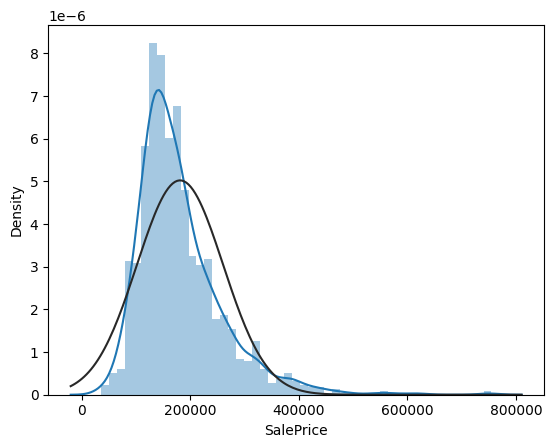

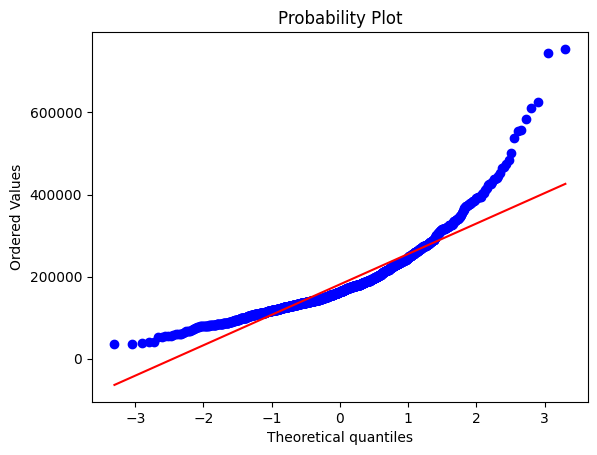

In [34]:
#Target Variable Analysis
from scipy.stats import norm
sns.distplot(df_train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

<ipython-input-35-dff149da0807>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'],fit=norm);


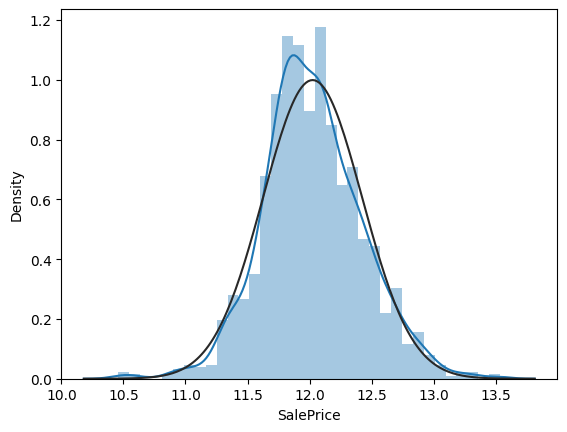

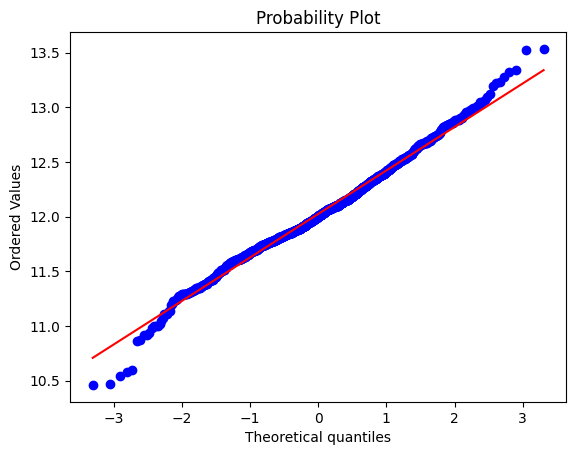

In [35]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [36]:
#First things first: A Random Tree Regressor
from sklearn.tree import DecisionTreeRegressor as dtr

X = df_train[['MoSold','YrSold','LotArea','BedroomAbvGr']]
Y = df_train[['SalePrice']]

X_test =df_test[['MoSold','YrSold','LotArea','BedroomAbvGr']]
print(X.head())
print(Y.head())

   MoSold  YrSold  LotArea  BedroomAbvGr
0       2    2008     8450             3
1       5    2007     9600             3
2       9    2008    11250             3
3       2    2006     9550             3
4      12    2008    14260             4
   SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216


In [37]:
from sklearn.model_selection import cross_val_score

DTR_1 = dtr(max_depth=None)
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance')
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [-0.42417871 -0.26354002 -0.31157503 -0.45849285 -0.17404557 -0.6206363
 -0.42931369 -0.59997211 -1.17566044 -0.38941896]
Est. explained variance: -0.48 (+/- 0.53)


In [38]:
#Seeing the Random Forest for the Trees
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2)
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2)

estimators: 2
Est. explained variance: -0.16 (+/- 0.23)

estimators: 5
Est. explained variance: 0.01 (+/- 0.26)

estimators: 10
Est. explained variance: 0.10 (+/- 0.20)

estimators: 15
Est. explained variance: 0.12 (+/- 0.21)

estimators: 20
Est. explained variance: 0.15 (+/- 0.16)

estimators: 25
Est. explained variance: 0.14 (+/- 0.19)

estimators: 30
Est. explained variance: 0.13 (+/- 0.21)

estimators: 35
Est. explained variance: 0.16 (+/- 0.17)

estimators: 40
Est. explained variance: 0.15 (+/- 0.16)

estimators: 45
Est. explained variance: 0.16 (+/- 0.16)

estimators: 50
Est. explained variance: 0.15 (+/- 0.18)

estimators: 55
Est. explained variance: 0.16 (+/- 0.18)

estimators: 60
Est. explained variance: 0.16 (+/- 0.19)

estimators: 65
Est. explained variance: 0.15 (+/- 0.19)

estimators: 70
Est. explained variance: 0.16 (+/- 0.18)

estimators: 75
Est. explained variance: 0.16 (+/- 0.18)

estimators: 80
Est. explained variance: 0.16 (+/- 0.18)



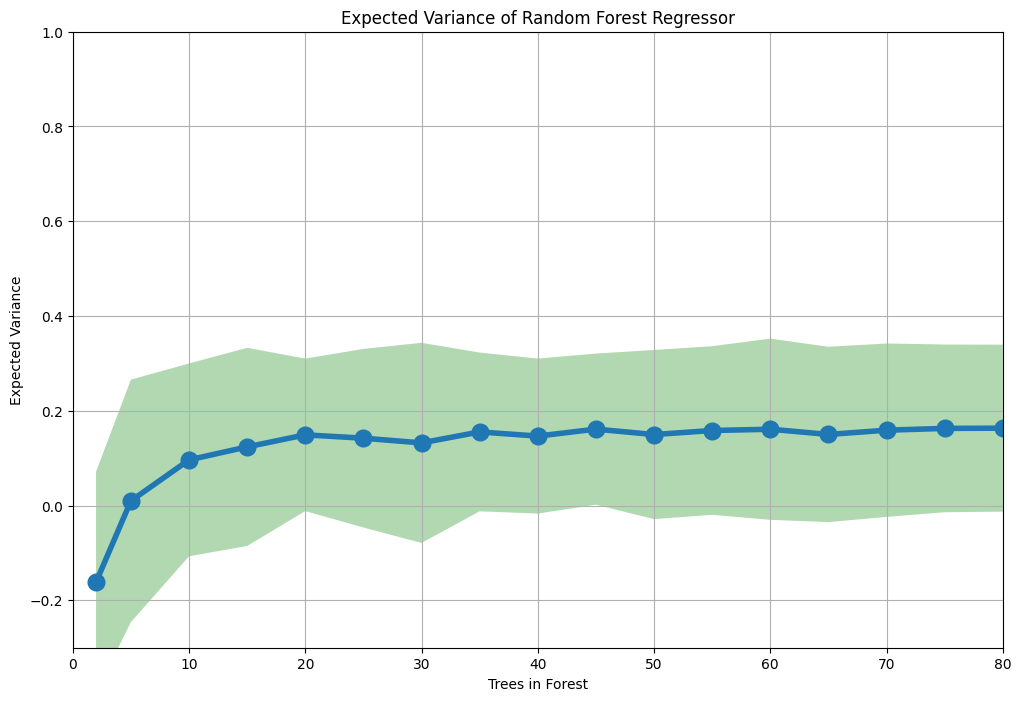

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

In [40]:
included_features = ['MoSold','YrSold','LotArea','BedroomAbvGr',
                    'FullBath','HalfBath','TotRmsAbvGrd',
                    'YearBuilt','YearRemodAdd',
                    'LotShape','Utilities']

X =df_train[included_features]
Y =df_train[['SalePrice']]

X_test =df_test[included_features]

for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
X.head()

<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]]


,MoSold,YrSold,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,Utilities
0,2,2008,8450,3,2,1,8,2003,2003,0,0
1,5,2007,9600,3,2,0,6,1976,1976,0,0
2,9,2008,11250,3,2,1,6,2001,2002,1,0
3,2,2006,9550,3,1,0,7,1915,1970,1,0
4,12,2008,14260,4,2,1,9,2000,2000,1,0


In [41]:
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)

for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print("")
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2)
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2)

estimators: 2
Est. explained variance: 0.58 (+/- 0.17)

estimators: 5
Est. explained variance: 0.67 (+/- 0.09)

estimators: 10
Est. explained variance: 0.69 (+/- 0.10)

estimators: 15
Est. explained variance: 0.69 (+/- 0.09)

estimators: 20
Est. explained variance: 0.70 (+/- 0.09)

estimators: 25
Est. explained variance: 0.70 (+/- 0.10)

estimators: 30
Est. explained variance: 0.71 (+/- 0.08)

estimators: 35
Est. explained variance: 0.71 (+/- 0.09)

estimators: 40
Est. explained variance: 0.71 (+/- 0.10)

estimators: 45
Est. explained variance: 0.72 (+/- 0.08)

estimators: 50
Est. explained variance: 0.71 (+/- 0.09)

estimators: 55
Est. explained variance: 0.72 (+/- 0.09)

estimators: 60
Est. explained variance: 0.72 (+/- 0.10)

estimators: 65
Est. explained variance: 0.71 (+/- 0.08)

estimators: 70
Est. explained variance: 0.71 (+/- 0.09)

estimators: 75
Est. explained variance: 0.72 (+/- 0.09)

estimators: 80
Est. explained variance: 0.72 (+/- 0.09)



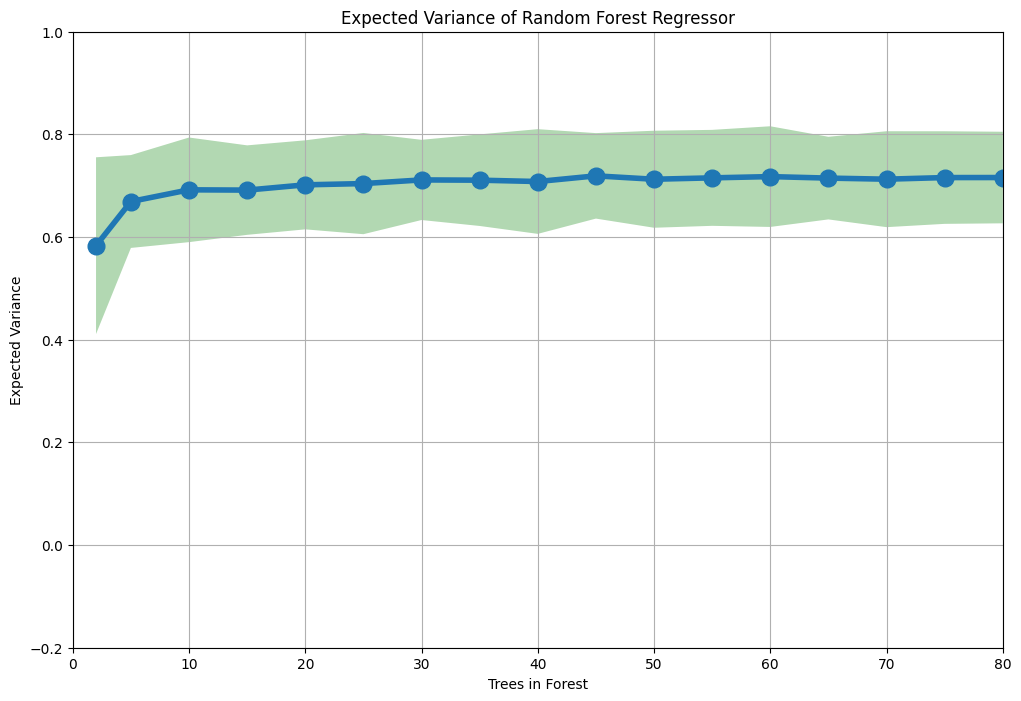

In [47]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.2,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

In [48]:
#Scientific-ish Feature Analysis to Improve Random Forest Regressors
import sklearn.feature_selection as fs
df_train = pd.read_csv('/content/train.csv')
df_train['SalePrice'] = np.log(df_train['SalePrice'])

included_features = [col for col in list(df_train)
                    if len([i for i in df_train[col].T.notnull() if i == True])==1460
                    and col!='SalePrice' and col!='id']

X = df_train[included_features]
Y = df_train[['SalePrice']]
yt = [i for i in Y['SalePrice']]
X_test = df_test[included_features]

for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
X.head()

<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]]
<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]]
<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,8450,0,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,2,20,0,9600,0,0,0,0,3,0,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,11250,0,1,0,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,4,70,0,9550,0,1,0,0,1,0,...,35,272,0,0,0,0,2,2006,0,2
4,5,60,0,14260,0,1,0,0,3,0,...,84,0,0,0,0,0,12,2008,0,0


In [49]:
mir_result = fs.mutual_info_regression(X, yt) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True)
print(np.array(sorted_scores))

[['OverallQual' '0.5185694671702841']
 ['GrLivArea' '0.36286086423554176']
 ['GarageCars' '0.3620325659695187']
 ['KitchenQual' '0.32808821618003825']
 ['ExterQual' '0.3255090827675704']
 ['GarageArea' '0.28666224274813024']
 ['FullBath' '0.26802704248542586']
 ['YearBuilt' '0.25950047310339874']
 ['TotalBsmtSF' '0.25528351363793833']
 ['1stFlrSF' '0.25436720093755305']
 ['YearRemodAdd' '0.19341329273483288']
 ['Foundation' '0.18924713548294192']
 ['TotRmsAbvGrd' '0.18228116687157137']
 ['Fireplaces' '0.1704550254432231']
 ['HeatingQC' '0.1613805731619069']
 ['BsmtFinSF1' '0.13007359485788283']
 ['MSZoning' '0.1198233386927996']
 ['OverallCond' '0.11406671688204684']
 ['2ndFlrSF' '0.10686728311104643']
 ['LotArea' '0.09578511363480602']
 ['LotShape' '0.08921145212734038']
 ['HalfBath' '0.08864815134072823']
 ['SaleType' '0.07689854822049647']
 ['SaleCondition' '0.07672355637240535']
 ['BedroomAbvGr' '0.07245786638564722']
 ['OpenPorchSF' '0.0696159520076216']
 ['CentralAir' '0.06675673

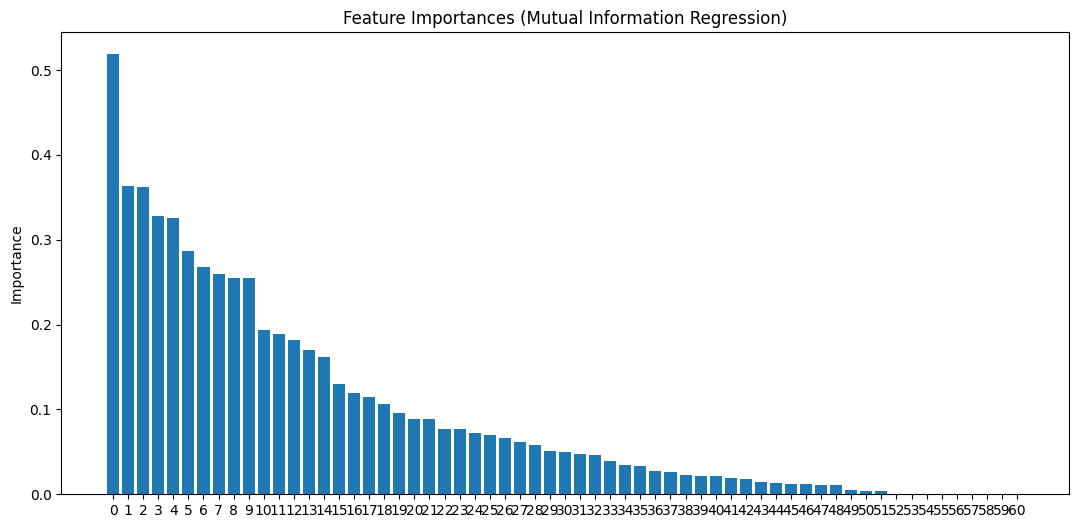

In [50]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ind = np.arange(len(included_features))
plt.bar(ind,[float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
plt.show()

In [65]:
# define a function to do the necessary model building
def getModel(sorted_scores,train,numFeatures):
    included_features = np.array(sorted_scores)[:,0][:numFeatures]
    X = train[included_features]
    Y = train[['SalePrice']]
    for col in list(X):
        if X[col].dtype=='object':
            X = getObjectFeature(X, col)
    estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
    mean_rfrs = []
    std_rfrs_upper = []
    std_rfrs_lower = []
    yt = [i for i in Y['SalePrice']]
    np.random.seed(11111)
    for i in estimators:
        model = rfr(n_estimators=i,max_depth=None)
        scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
        mean_rfrs.append(scores_rfr.mean())
        std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2)
        std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2)
    return mean_rfrs,std_rfrs_upper,std_rfrs_lower

def plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,numFeatures):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(estimators,mean_rfrs,marker='o',
           linewidth=4,markersize=12)
    ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                    facecolor='green',alpha=0.3,interpolate=True)
    ax.set_ylim([-.2,1])
    ax.set_xlim([0,80])
    plt.title('Expected Variance of Random Forest Regressor: Top %d Features'%numFeatures)
    plt.ylabel('Expected Variance')
    plt.xlabel('Trees in Forest')
    plt.grid()
    plt.show()
    return

<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

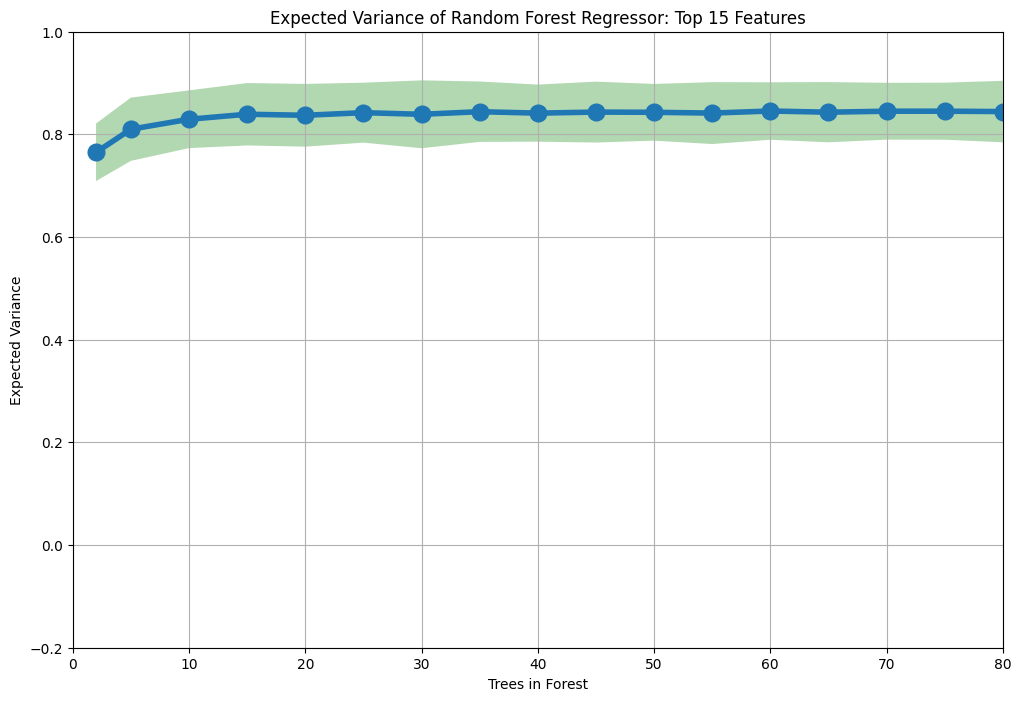

In [66]:
#top 15
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,df_train,15)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,15)

<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

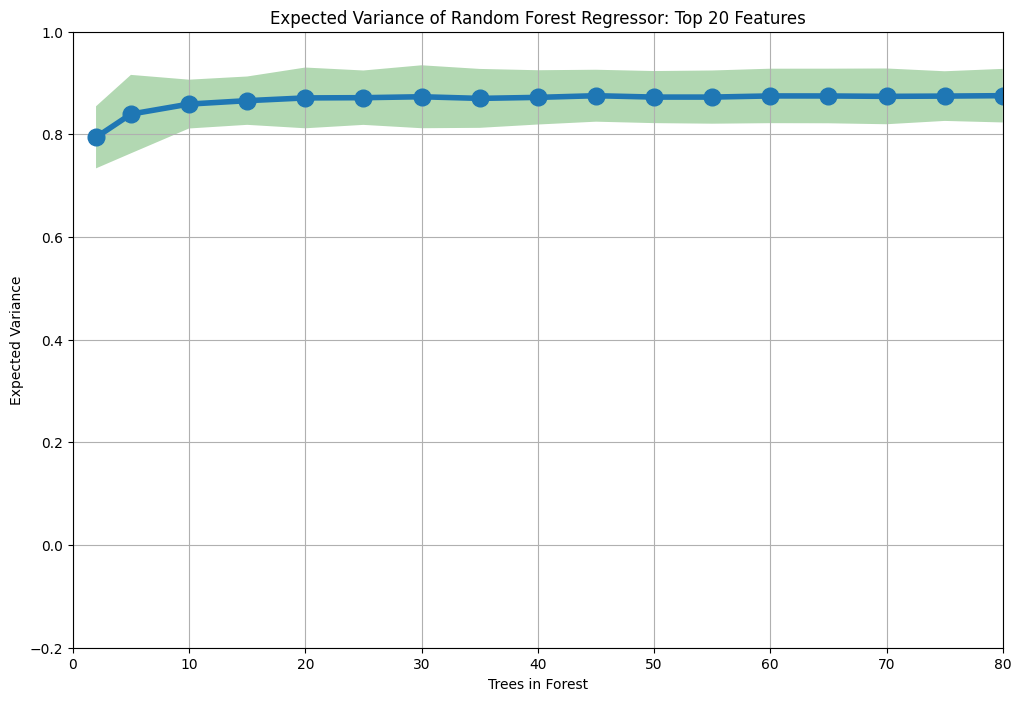

In [67]:
#top 20
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,df_train,20)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,20)

<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

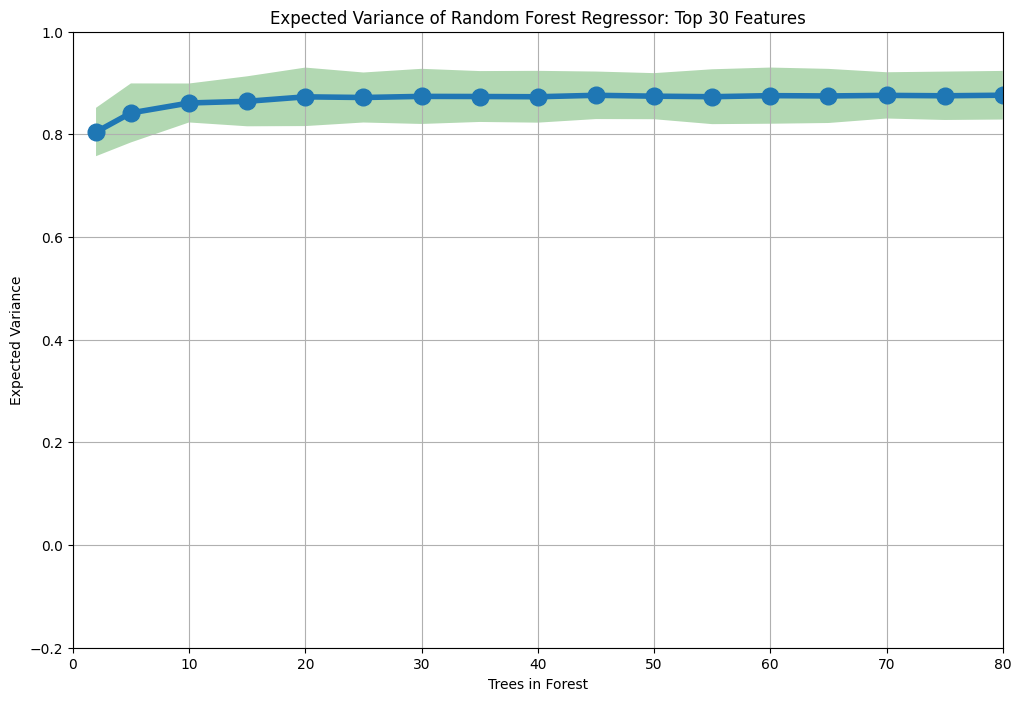

In [68]:
#top 30
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,df_train,30)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,30)

<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

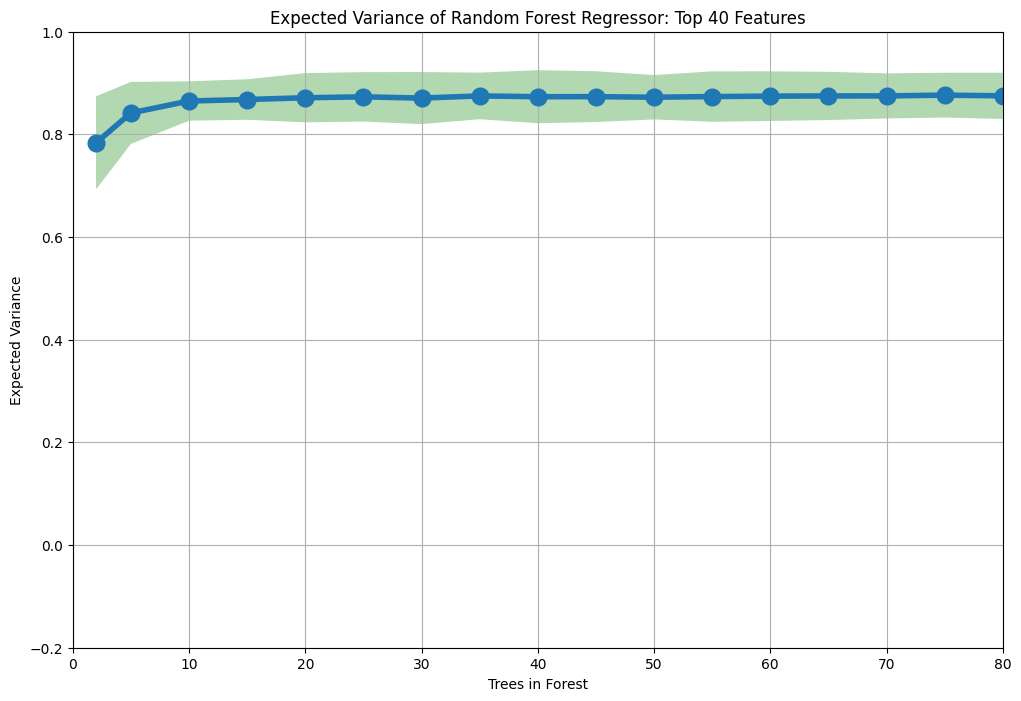

In [69]:
#top 40
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,df_train,40)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,40)

<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

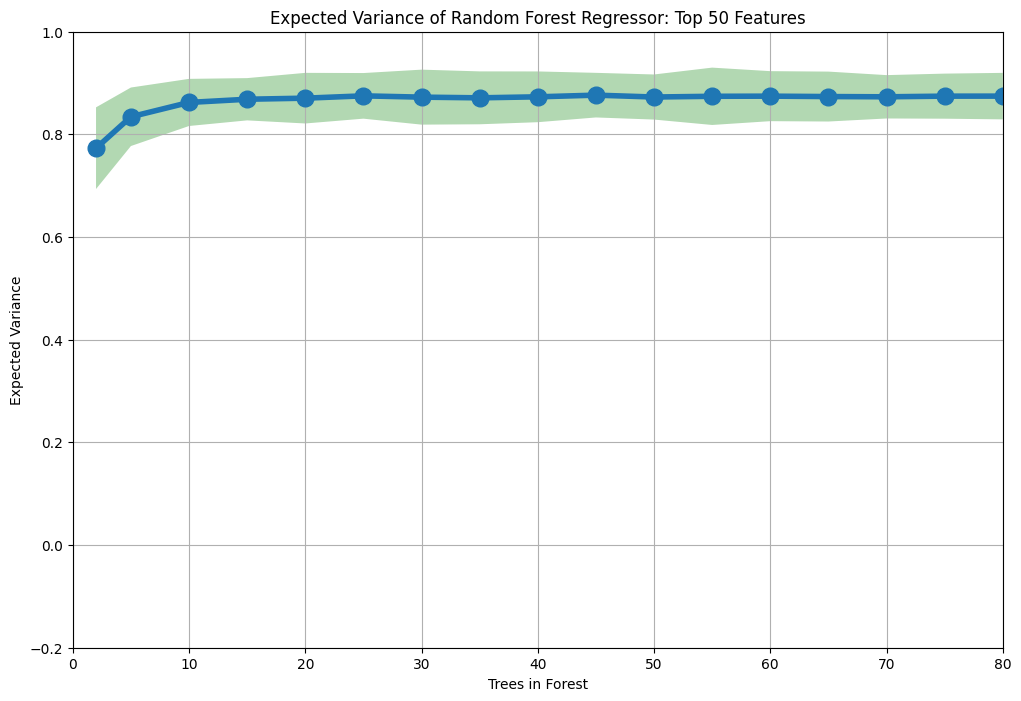

In [70]:
#top 50
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,df_train,50)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,50)

In [56]:
numFeatures = 40
trees = 60
included_features = np.array(sorted_scores)[:,0][:numFeatures]

X = df_train[included_features]
Y = df_train[['SalePrice']]

for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

model.fit(X,yt)

<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]]
<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]]
<ipython-input-33-0a599ad4ac7f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

explained variance scores for k=10 fold validation: [0.84312059 0.8960758  0.89390521 0.84111975 0.86792212 0.90345242
 0.88712739 0.90147031 0.85814461 0.85967901]
Est. explained variance: 0.88 (+/- 0.05)


RandomForestRegressor(n_estimators=60)

In [57]:
df_test = pd.read_csv('/content/test.csv')

In [58]:
def getObjectFeature(df, col, datalength=1460):
    if df[col].dtype!='object':
        print('feature',col,'is not an object feature.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts()
        df1[col] = [counts.index.tolist().index(i)
                    if i in counts.index.tolist()
                    else 0
                    for i in df1[col] ]
        return df1

In [60]:
X_test =df_test[included_features]
for col in list(X_test):
    if X_test[col].dtype=='object':
        X_test = getObjectFeature(X_test, col, datalength=1459)
y_output = model.predict(X_test.fillna(0))
print(y_output)

[11.76870882 11.94365313 12.08707591 ... 11.96222443 11.67320176
 12.3535405 ]


<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i)
<ipython-input-58-fdc7b3e5c2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [61]:
y_output = np.exp(y_output)
print(y_output)

[129147.29044456 153837.65408989 177562.13941897 ... 156721.31249954
 117383.51549358 231779.20627992]


In [63]:
saleprice = pd.DataFrame(y_output, columns=['SalePrice'])
results = pd.concat([df_test['Id'],saleprice['SalePrice']],axis=1)
results.head()

,Id,SalePrice
0,1461,129147.290445
1,1462,153837.654090
2,1463,177562.139419
3,1464,182321.516373
4,1465,196665.355607


In [64]:
results.to_csv('housepricing_submission.csv',index = False)